<a href="https://colab.research.google.com/github/Veciam-CF/DSPS_ZGao/blob/main/HW2/Solution_Instructions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [ ]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats


In [35]:
Norm_0 = sp.stats.norm(loc=0, scale=1)
Norm_10 = sp.stats.norm(loc=10, scale=1)
tStudent_0 = sp.stats.t(df=2, loc=0)
tStudent_10 = sp.stats.t(df=2, loc=10)


In [70]:
def posterior(prior, likelihood):
  x = np.linspace(-10, 25, 1000)
  normalized_prior = prior.pdf(x)
  normalized_likelihood = likelihood.pdf(x)
  this_posterior = normalized_prior * normalized_likelihood
  this_posterior /= np.trapz(this_posterior, x)
  plt.plot(x,normalized_prior,'--',color='black',label='normalized_prior')
  plt.plot(x,normalized_likelihood,'-',color='black',label='normalized_likelihood')
  plt.plot(x,this_posterior,'-',color='red',label='normalized_posterior')
  plt.xlabel('x') #all plots need axis labels!!
  plt.ylabel('Nomalized possiblity') #all plots need axis labels!!
  plt.legend()

/tmp/ipython-input-1367633740.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  this_posterior /= np.trapz(this_posterior, x)


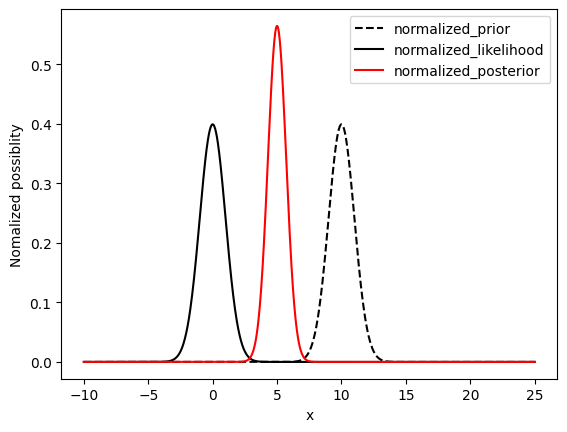

In [71]:
#function call
posterior(Norm_10,Norm_0)

**Fig 1:** The plot of Norm-Norm.The prior is normal distribution locates at 10 and the likelihood is a different normal distribution located at 0. Both of them has a variance of 1. The posterior is very small. After normlaizing the posterior, the posterior shows the shape as one mound which is located at the center of two distribution. The x axis is been set to be aribitrary unit. y axis is the normalized possiblity.

/tmp/ipython-input-1367633740.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  this_posterior /= np.trapz(this_posterior, x)


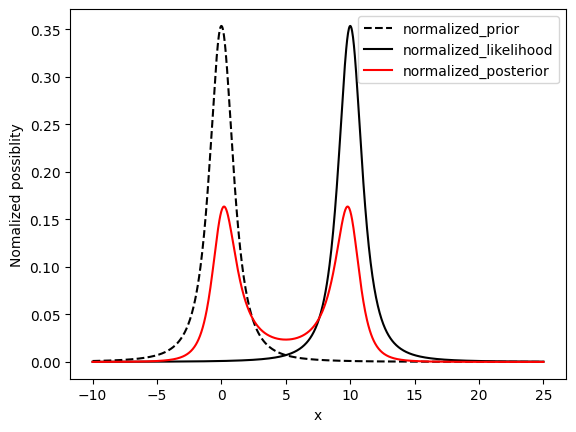

In [72]:
posterior(tStudent_0,tStudent_10)

**Fig 2:** The plot of student-student.The prior is students distribution locates at 0 and the likelihood is a different student distribution located at 10. Both of them has degree of freedom of 2. The posterior is very small. After normlaizing the posterior, the posterior shows the shape as two mound. The x axis is been set to be aribitrary unit. y axis is the normalized possiblity.

/tmp/ipython-input-1367633740.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  this_posterior /= np.trapz(this_posterior, x)


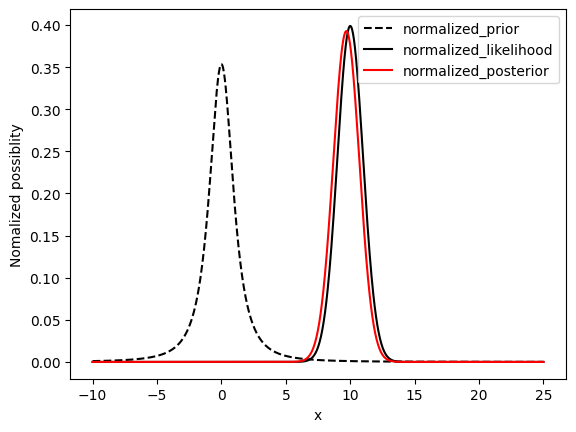

In [75]:
posterior(tStudent_0,Norm_10)

**Fig 3:** The plot of student-norm.The prior is students distribution locates at 0 and the likelihood is a normal distribution located at 10. The students distribution has a degree of freedom of 2 and the normal distribution has been set as variance equals to 1. The posterior is very small. After normlaizing the posterior, the posterior shows very close to the normal distribution. The x axis is been set to be aribitrary unit. The y axis is the normalized possiblity.

/tmp/ipython-input-1367633740.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  this_posterior /= np.trapz(this_posterior, x)


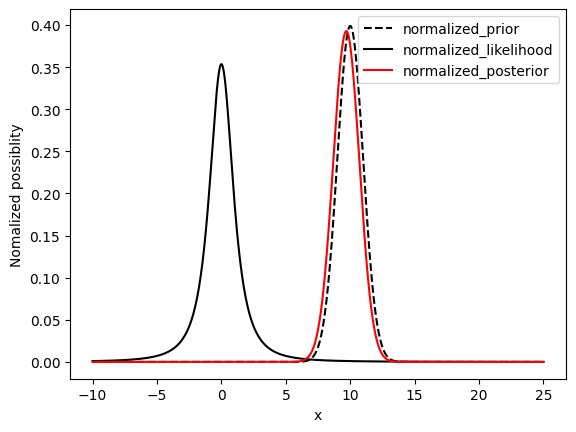

In [74]:
posterior(Norm_10,tStudent_0)

**Fig4：** The plot of norm-student.The prior is normal distribution locates at 10 and the likelihood is a student distribution located at 0. The students distribution has a degree of freedom of 2 and the normal distribution has been set as variance equals to 1. The posterior is very small. After normlaizing the posterior, the posterior shows very close to the normal distribution as previous one. The x axis is been set to be aribitrary unit. The y axis is the normalized possiblity.